In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from hs2 import herdingspikes
from Probe import NeuralProbe, NeuroPixel, BioCam
import numpy as np

%matplotlib inline

In [2]:
# data = h5py.File(data_path, 'r')
# data = np.fromfile(data_path, dtype=np.int16).reshape((1800000,385))

# Probe = NeuroPixel(fps=30000)
Probe = BioCam()
H = herdingspikes(Probe)

In [3]:
# Probe.show(figwidth=12, show_neighbors=[-20])

In [4]:
# detectData(data, neighbours, spikefilename, shapefilename, channels, sfd, thres, maa = None, maxsl = None, minsl = None, ahpthr = None, tpre = 1, tpost = 2)
# MinAvgAmp minimal avg. amplitude of peak (in units of Qd)
# MaxSl dead time in frames after peak, used for further testing
# MinSl length considered for determining avg. spike amplitude
# AHPthr signal should go below that threshold within MaxSl-Slmin frames

# data_path = '/home/cole/neuropixeldata/rawDataSample.bin'
data_path = '/data/MEA/neuropixel/rawDataSample.bin'
data_format = 'flat'

data_path = '/data/MEA/LightStim/P29_16_07_14/P29_16_05_14_retina02_left_stim3_fullarray_fullfieldHDF5.brw'
data_format = 'biocam'

to_localize = True
cutout_start = 10
cutout_end = 30
threshold = 20

In [5]:
# H.DetectFromRaw(data_path,
#                 to_localize, cutout_start, cutout_end, threshold,
#                 maa=0, maxsl=12, minsl=3, ahpthr=0, data_format=data_format)

# # OR

H.LoadDetected()

In [6]:
# H.PlotTracesChannels(data_path, 1022)

(-3.1509856630824369,
 66.150985663082437,
 -3.1510117733627672,
 66.151011773362768)

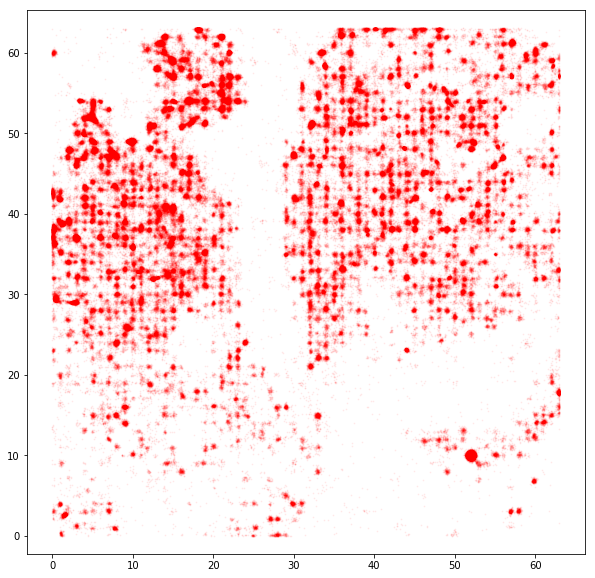

In [7]:
plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1, alpha=0.05)
plt.axis('equal')

In [8]:
# H.CombinedClustering(alpha=40,
#                     bandwidth = 20, bin_seeding=True, min_bin_freq=10,
#                     pca_ncomponents=2, pca_whiten=True,
#                     n_jobs=-1)
H.CombinedClustering(alpha=0.4,
                    bandwidth = 0.3, bin_seeding=True, min_bin_freq=10,
                    pca_ncomponents=2, pca_whiten=True,
                    n_jobs=-1)

total number of seeds: 8320
seeds/job: 2081
using 4 cpus


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.3min finished


Number of estimated clusters: 980


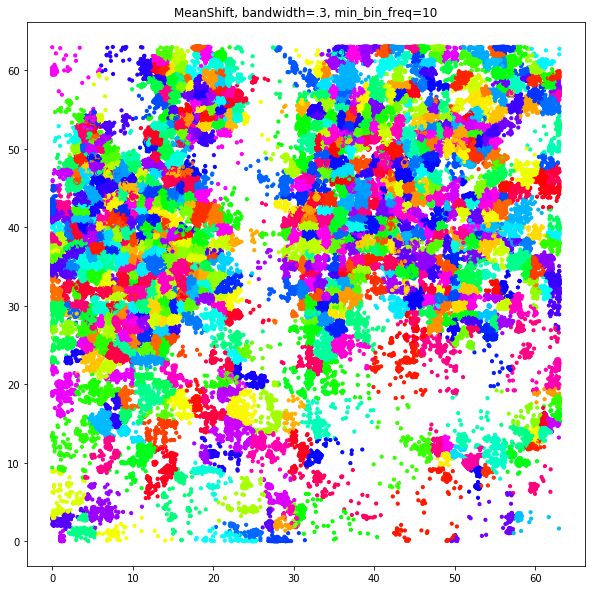

In [9]:
plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=1)
# plt.xlim((1350,1600))
plt.title("MeanShift, bandwidth=.3, min_bin_freq=10")

In [7]:
from sklearn.cluster import DBSCAN

H.CombinedClustering(eps=1, alpha=0.3, clustering_algorithm=DBSCAN,
                    min_samples=10, pca_ncomponents=2, pca_whiten=True,
                    n_jobs=-1)

Number of estimated clusters: 40


/home/mhennig/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/mhennig/.local/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


/home/mhennig/.local/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


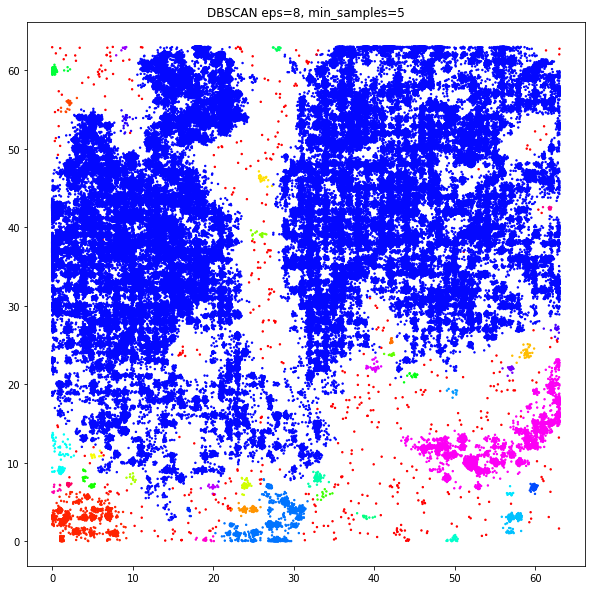

In [8]:
plt.figure(figsize=(10, 10))
H.PlotAll(invert=True, s=2)
plt.title("DBSCAN eps=8, min_samples=5")
# plt.xlim((1350,1600))


In [ ]:
units = (121,4)

H.PlotShapes(units)